In [1]:
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('banking_updated.csv')
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


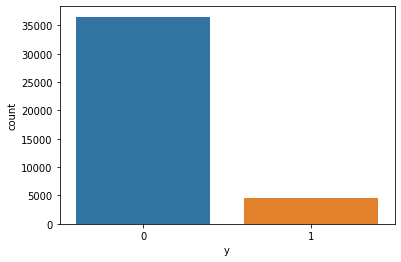

In [3]:
# visualize the counts in each classes
sns.countplot(x='y', data=df)

In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

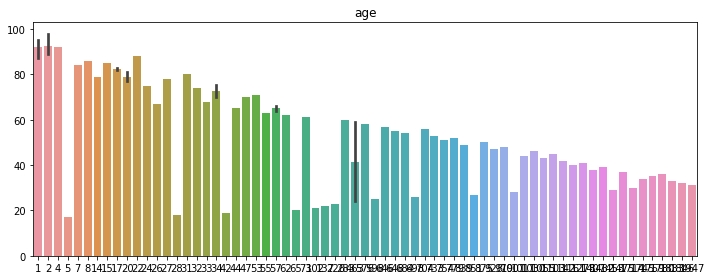

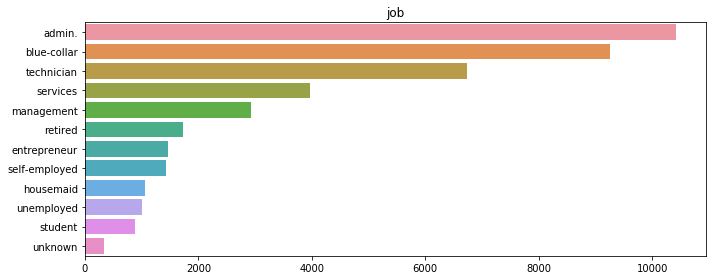

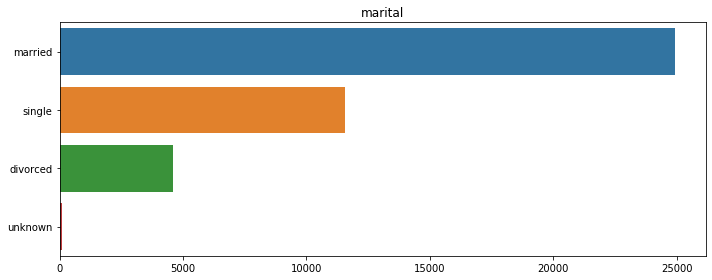

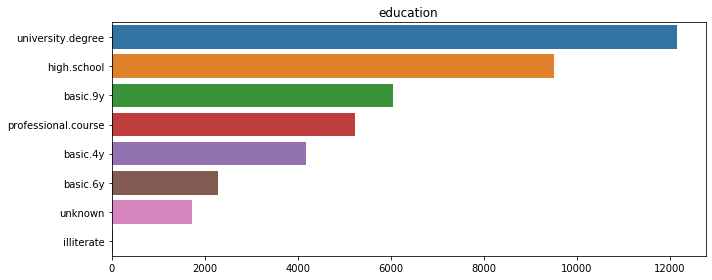

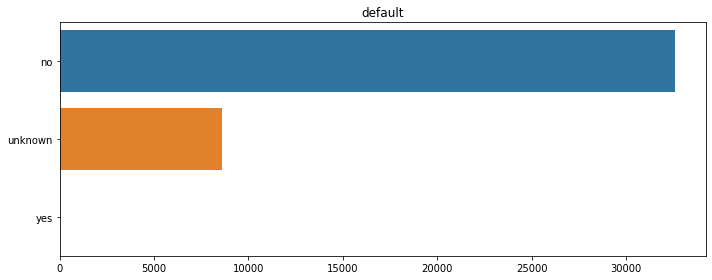

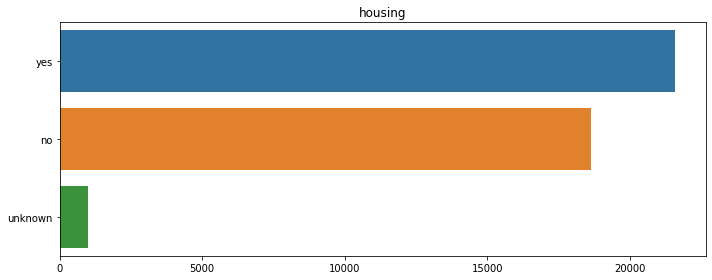

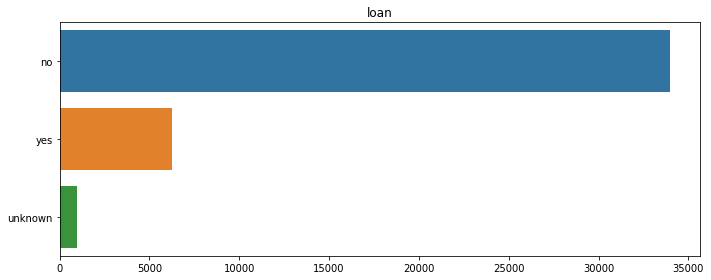

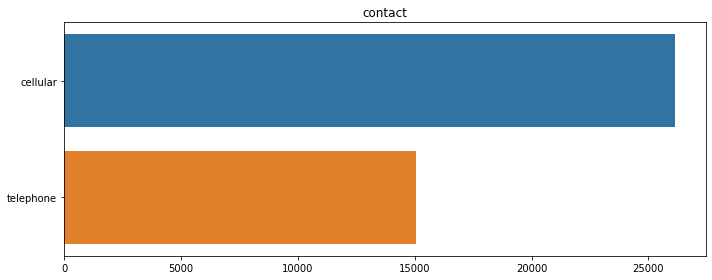

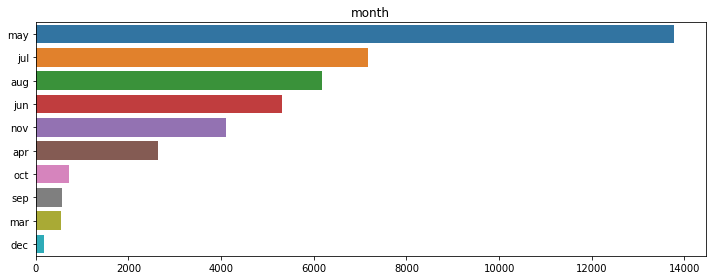

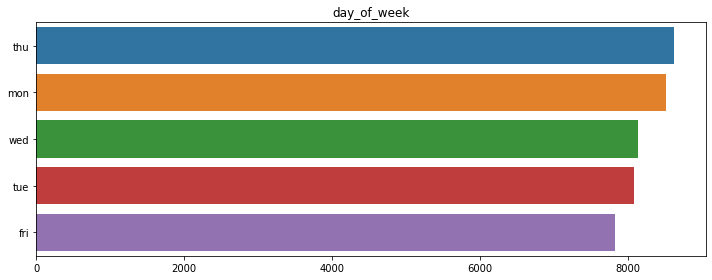

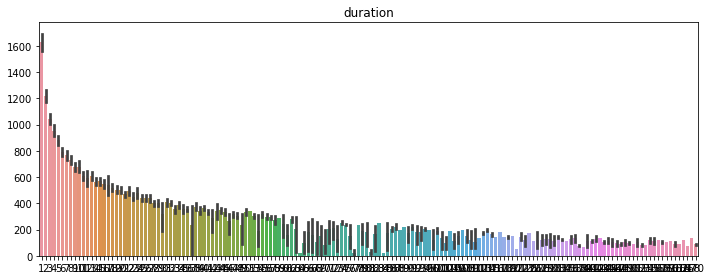

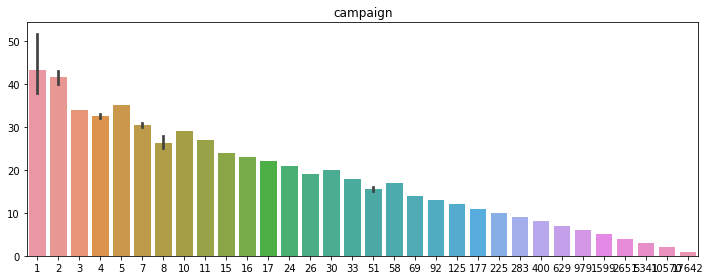

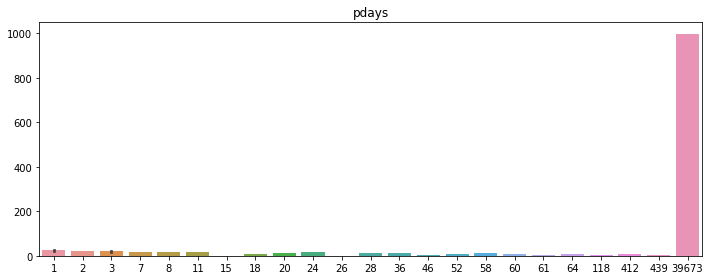

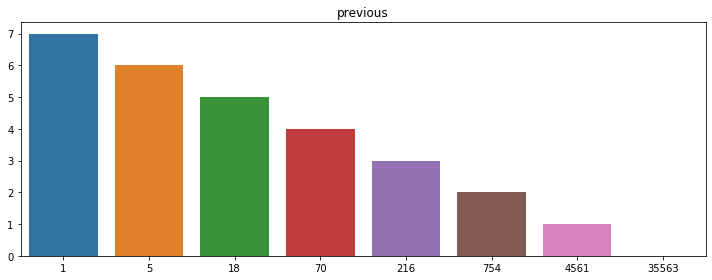

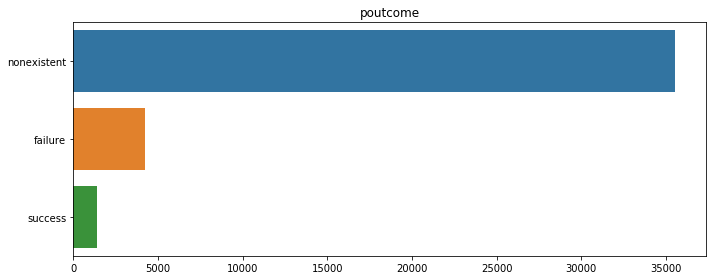

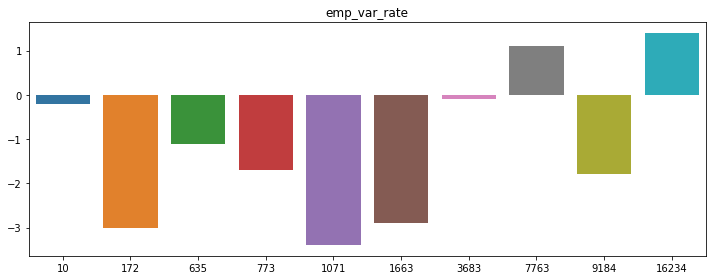

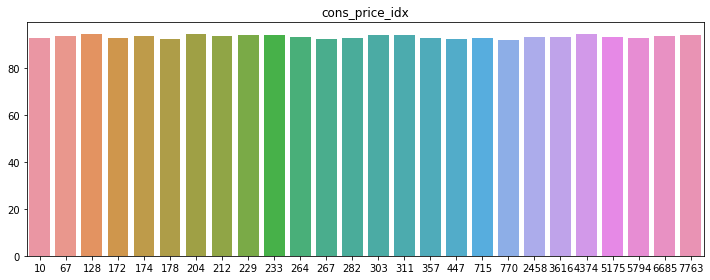

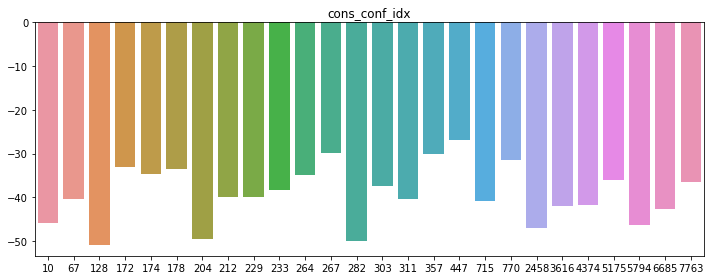

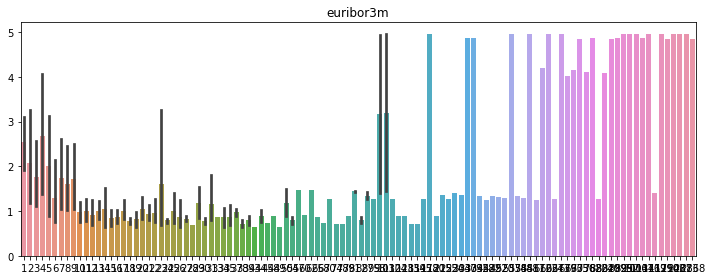

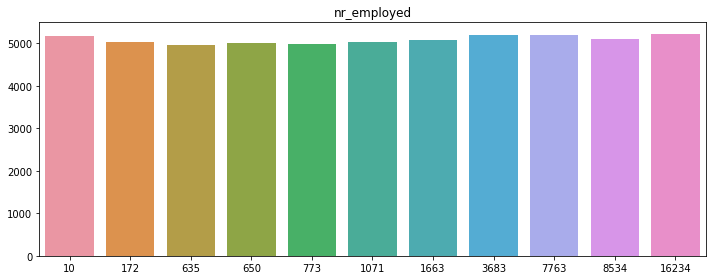

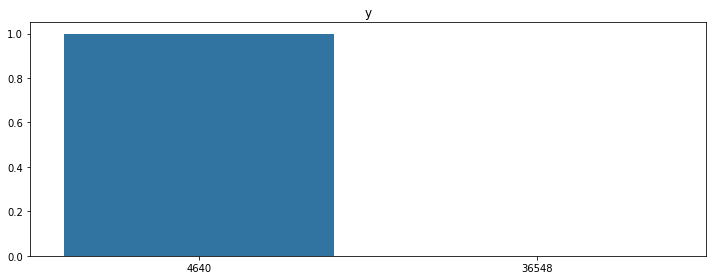

In [42]:
#  Visualize the counts of each variable
variables = df.columns
for col in variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [4]:
 #Pre Processing--  encoding the levels of a categorical features into numeric values
le = preprocessing.LabelEncoder()
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)
df.day_of_week = le.fit_transform(df.day_of_week)
df.month = le.fit_transform(df.month)
df.contact = le.fit_transform(df.contact)
df.default = le.fit_transform(df.default)

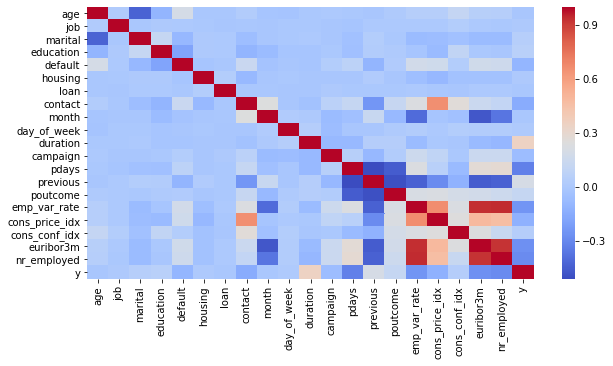

In [9]:
# Heatplot to visualise correlation
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

In [21]:
# Correlation Matrix
# df.corr()

In [5]:
# correlation greater than 0.2
df.drop(['age','job','marital','education','default','housing','loan','contact','month','day_of_week','campaign','pdays','poutcome','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'],axis=1,inplace=True)
# correlation greater than 0.1
# df.drop(['age','job','marital','education','default','housing','loan','contact','month','day_of_week','campaign','pdays','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'],axis=1,inplace=True)
# positive correlation
# df.drop(['default','loan','contact','month','campaign','pdays','emp_var_rate','cons_price_idx','euribor3m','nr_employed'],axis=1,inplace=True) 
# correlation greater than -ve and +ve
# df.drop(['age','job','marital','education','default','housing','loan','month','day_of_week','campaign','cons_conf_idx','nr_employed'],axis=1,inplace=True)


In [6]:
df.shape

(41188, 3)

In [7]:
# Logistic regression 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) #80/20 split
# Standadice the data
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)


# Logistic regression
model=LogisticRegression(penalty='l2', max_iter=1000)
model.fit(x_train, y_train)
prediction=model.predict(x_test)
print(accuracy_score(y_test, prediction))

0.9002994254268836
